In [2]:
!pip install -q google-generativeai

In [3]:
import pandas as pd

# Read the JSON file into a pandas DataFrame
df = pd.read_json('AQUA.json',lines=True)

# Write the DataFrame to a CSV file
df.to_csv('AQUA1.csv', index=False)

print("Conversion completed successfully.")

Conversion completed successfully.


In [92]:
hi=pd.read_csv('AQUA1.csv')
hi.head()

,question,correct,rationale,options
0,"A car is being driven , in a straight line and...",A,Explanation :\nLet the height of the building ...,"['A ) 5 ( √ 3 + 1 )', 'B ) 6 ( √ 3 + √ 2 )', '..."
1,The original price of an item is discounted 22...,E,Let x be the original price of the item\nDisco...,"['A ) $ 61', 'B ) $ 65', 'C ) $ 67.40', 'D ) $..."
2,Find out which of the following values is the ...,A,9 = 3 * 3\n12 = 3 * 4\nThe number should defin...,"['A ) 36', 'B ) 15', 'C ) 17', 'D ) 5', 'E ) 7']"
3,If the probability that Stock A will increase ...,B,The probability that stock A does not increase...,"['A ) 0.22', 'B ) 0.26', 'C ) 0.37', 'D ) 0.46..."
4,A trader sold an article at a profit of 20 % f...,B,Cost Price = Selling Price / ( 100 + Profit % ...,"['A ) 270', 'B ) 300', 'C ) 280', 'D ) 320', '..."


In [5]:
hi.shape

(254, 4)

In [93]:
df=pd.read_csv('AQUA1.csv')
print(df.shape)
df.head()

(254, 4)


,question,correct,rationale,options
0,"A car is being driven , in a straight line and...",A,Explanation :\nLet the height of the building ...,"['A ) 5 ( √ 3 + 1 )', 'B ) 6 ( √ 3 + √ 2 )', '..."
1,The original price of an item is discounted 22...,E,Let x be the original price of the item\nDisco...,"['A ) $ 61', 'B ) $ 65', 'C ) $ 67.40', 'D ) $..."
2,Find out which of the following values is the ...,A,9 = 3 * 3\n12 = 3 * 4\nThe number should defin...,"['A ) 36', 'B ) 15', 'C ) 17', 'D ) 5', 'E ) 7']"
3,If the probability that Stock A will increase ...,B,The probability that stock A does not increase...,"['A ) 0.22', 'B ) 0.26', 'C ) 0.37', 'D ) 0.46..."
4,A trader sold an article at a profit of 20 % f...,B,Cost Price = Selling Price / ( 100 + Profit % ...,"['A ) 270', 'B ) 300', 'C ) 280', 'D ) 320', '..."


In [7]:
import google.generativeai as palm

In [12]:
palm.configure(api_key="Your_Own_API_Key")# Replace "Your_Own_API_Key" with your own API key , can be generated at https://ai.google.dev/tutorials/setup

In [9]:
models=[m for m in palm.list_models() if "generateText" in m.supported_generation_methods]

for m in models:
    print(f"Model Name: {m.name}")

Model Name: models/text-bison-001


In [10]:
model=models[0].name
model

'models/text-bison-001'

 # Let's start to experiment with our AQUA data set

## 4 shot CoT Example

In [19]:
# Open the text file in write mode
with open('evaluation_PaLM_4shot_CoT_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        After looking at the following 4 questions and their detailed answers  , write a solution with step-by-step explanation for the 5th question:
        Question1: "John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is? Answer Choices: (a) 50 (b) 45 (c) 65 (d) 78 (e) 64 "
        Answer: "If 10 is added to each number, then the mean of the numbers also increases by 10. So the new mean would be 50. The answer is (a)."
        Question2: "If a / b = 3/4 and 8a + 5b = 22,then find the value of a.Answer Choices: (a) 1/2 (b) 3/2 (c) 5/2 (d) 4/2 (e) 7/2"
        Answer: "If a / b = 3/4, then b = 4a / 3. So 8a + 5(4a / 3) = 22. This simplifies to 8a + 20a / 3 = 22, which means 44a / 3= 22. So a is equal to 3/2. The answer is (b)."
        Question3: "A person is traveling at 20 km/hr and reached his destiny in 2.5 hr then find the distance?Answer Choices: (a) 53 km (b) 55 km (c) 52 km (d) 60 km (e) 50 km"
        Answer: "The distance that the person traveled would have been 20 km/hr * 2.5 hrs = 50 km. The answer is (e)."
        Question4: "How many keystrokes are needed to type the numbers from 1 to 500? Answer Choices: (a) 1156 (b) 1392 (c) 1480 (d) 1562 (e) 1788"
        Answer: "There are 9 one-digit numbers from 1 to 9. There are 90 two-digit numbers from 10 to 99. There are 401 three-digit numbers from 100 to 500. 9 + 90(2) + 401(3) = 1392. The answer is (b)."

        Question5: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_4shot_CoT_AQUA.txt' created successfully.")

Text file 'evaluation_PaLM_4shot_CoT_AQUA.txt' created successfully.


## 3 Shot CoT Example

In [20]:
with open('evaluation_PaLM_3shot_CoT_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        After looking at the following 3 questions and their detailed answers  , write a solution with step-by-step explanation for the 4th question:
        Question1: "John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is? Answer Choices: (a) 50 (b) 45 (c) 65 (d) 78 (e) 64 "
        Answer: "If 10 is added to each number, then the mean of the numbers also increases by 10. So the new mean would be 50. The answer is (a)."
        Question2: "If a / b = 3/4 and 8a + 5b = 22,then find the value of a.Answer Choices: (a) 1/2 (b) 3/2 (c) 5/2 (d) 4/2 (e) 7/2"
        Answer: "If a / b = 3/4, then b = 4a / 3. So 8a + 5(4a / 3) = 22. This simplifies to 8a + 20a / 3 = 22, which means 44a / 3= 22. So a is equal to 3/2. The answer is (b)."
        Question3: "A person is traveling at 20 km/hr and reached his destiny in 2.5 hr then find the distance?Answer Choices: (a) 53 km (b) 55 km (c) 52 km (d) 60 km (e) 50 km"
        Answer: "The distance that the person traveled would have been 20 km/hr * 2.5 hrs = 50 km. The answer is (e)."
        

        Question4: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_3shot_CoT_AQUA.txt' created successfully.")

Text file 'evaluation_PaLM_3shot_CoT_AQUA.txt' created successfully.


## 2 Shot CoT Example

In [22]:
with open('evaluation_PaLM_2shot_CoT_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        After looking at the following 2 questions and their detailed answers  , write a solution with step-by-step explanation for the 3rd question:
        Question1: "John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is? Answer Choices: (a) 50 (b) 45 (c) 65 (d) 78 (e) 64 "
        Answer: "If 10 is added to each number, then the mean of the numbers also increases by 10. So the new mean would be 50. The answer is (a)."
        Question2: "If a / b = 3/4 and 8a + 5b = 22,then find the value of a.Answer Choices: (a) 1/2 (b) 3/2 (c) 5/2 (d) 4/2 (e) 7/2"
        Answer: "If a / b = 3/4, then b = 4a / 3. So 8a + 5(4a / 3) = 22. This simplifies to 8a + 20a / 3 = 22, which means 44a / 3= 22. So a is equal to 3/2. The answer is (b)."
        

        Question3: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_2shot_CoT_AQUA.txt' created successfully.")

Text file 'evaluation_PaLM_2shot_CoT_AQUA.txt' created successfully.


## 1 shot CoT Example

In [23]:
with open('evaluation_PaLM_1shot_CoT_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        After looking at the following 1 question and its detailed answers  , write a solution with step-by-step explanation for the 2nd question:
        Question1: "John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is? Answer Choices: (a) 50 (b) 45 (c) 65 (d) 78 (e) 64 "
        Answer: "If 10 is added to each number, then the mean of the numbers also increases by 10. So the new mean would be 50. The answer is (a)."
        

        Question2: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_1shot_CoT_AQUA.txt' created successfully.")

Text file 'evaluation_PaLM_1shot_CoT_AQUA.txt' created successfully.


# O shot CoT Example

In [24]:
with open('evaluation_PaLM_0shot_CoT_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        Write a solution with step-by-step explanation for the following question:

        

        Question1: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_0shot_CoT_AQUA.txt' created successfully.")

Text file 'evaluation_PaLM_0shot_CoT_AQUA.txt' created successfully.


## 4 shot standard prompt example

In [25]:
import pandas as pd


# Open the text file in write mode
with open('evaluation_PaLM_4shot_standardPrompt_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        After looking at the following 4 questions and their answers  , write a solution for the 5th question:
        Question1: "John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is? Answer Choices: (a) 50 (b) 45 (c) 65 (d) 78 (e) 64 "
        Answer: "The answer is (a)."
        Question2: "If a / b = 3/4 and 8a + 5b = 22,then find the value of a.Answer Choices: (a) 1/2 (b) 3/2 (c) 5/2 (d) 4/2 (e) 7/2"
        Answer: "The answer is (b)."
        Question3: "A person is traveling at 20 km/hr and reached his destiny in 2.5 hr then find the distance?Answer Choices: (a) 53 km (b) 55 km (c) 52 km (d) 60 km (e) 50 km"
        Answer: "The answer is (e)."
        Question4: "How many keystrokes are needed to type the numbers from 1 to 500? Answer Choices: (a) 1156 (b) 1392 (c) 1480 (d) 1562 (e) 1788"
        Answer: "The answer is (b)."

        Question5: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_4shot_standardPrompt_AQUA.txt' created successfully.")

Text file 'evaluation_PaLM_4shot_standardPrompt_AQUA.txt' created successfully.


## 3 shot standard prompt example

In [26]:
import pandas as pd


# Open the text file in write mode
with open('evaluation_PaLM_3shot_standardPrompt_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        After looking at the following 3 questions and their answers  , write a solution for the 4th question:
        Question1: "John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is? Answer Choices: (a) 50 (b) 45 (c) 65 (d) 78 (e) 64 "
        Answer: "The answer is (a)."
        Question2: "If a / b = 3/4 and 8a + 5b = 22,then find the value of a.Answer Choices: (a) 1/2 (b) 3/2 (c) 5/2 (d) 4/2 (e) 7/2"
        Answer: "The answer is (b)."
        Question3: "A person is traveling at 20 km/hr and reached his destiny in 2.5 hr then find the distance?Answer Choices: (a) 53 km (b) 55 km (c) 52 km (d) 60 km (e) 50 km"
        Answer: "The answer is (e)."


        Question4: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_3shot_standardPrompt_AQUA.txt' created successfully.")

Text file 'evaluation_PaLM_3shot_standardPrompt_AQUA.txt' created successfully.


## 2 shot standard prompt example

In [13]:
import pandas as pd


# Open the text file in write mode
with open('evaluation_PaLM_2shot_standardPrompt_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        After looking at the following 2 questions and their answers  , write a solution for the 3rd question:
        Question1: "John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is? Answer Choices: (a) 50 (b) 45 (c) 65 (d) 78 (e) 64 "
        Answer: "The answer is (a)."
        Question2: "If a / b = 3/4 and 8a + 5b = 22,then find the value of a.Answer Choices: (a) 1/2 (b) 3/2 (c) 5/2 (d) 4/2 (e) 7/2"
        Answer: "The answer is (b)."



        Question3: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_2shot_standardPrompt_AQUA.txt' created successfully.")

Text file 'evaluation_PaLM_2shot_standardPrompt_AQUA.txt' created successfully.


## 1 shot standard prompt

In [14]:
import pandas as pd




# Open the text file in write mode
with open('evaluation_PaLM_1shot_standardPrompt_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        After looking at the following 1 question and its answers  , write a solution for the 2nd question:
        Question1: "John found that the average of 15 numbers is 40. If 10 is added to each number then the mean of the numbers is? Answer Choices: (a) 50 (b) 45 (c) 65 (d) 78 (e) 64 "
        Answer: "The answer is (a)."




        Question2: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_1shot_standardPrompt_AQUA.txt' created successfully.")

Text file 'evaluation_PaLM_1shot_standardPrompt_AQUA.txt' created successfully.


## Zero shot standsrd prompt

In [17]:
import pandas as pd




# Open the text file in write mode
with open('evaluation_PaLM_0shot_standardPrompt_AQUA.txt', 'w',encoding="utf-8") as file:
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        question = row['question']+row['options']
        answer = row['rationale']+'\n .Correct Answer is '+row['correct']
        prompt=f'''
        Solve the following question:
   




        Question1: {question}
        '''
        completion=palm.generate_text(model=model,prompt=prompt,temperature=0.5,max_output_tokens=1024)
        model_answer=completion.result
        # Write the question and the new answer to the text file
        file.write(f"QUESTION: {question}\n***********************************\nANSWER: {answer}\n**********************************\nMODEL's_ANSWER: {model_answer}\n##############################################################################################\n")
        
       
        
   


print("Text file 'evaluation_PaLM_0shot_standardPrompt.txt' created successfully.")

Text file 'evaluation_PaLM_0shot_standardPrompt.txt' created successfully.


Let's plot performance graph

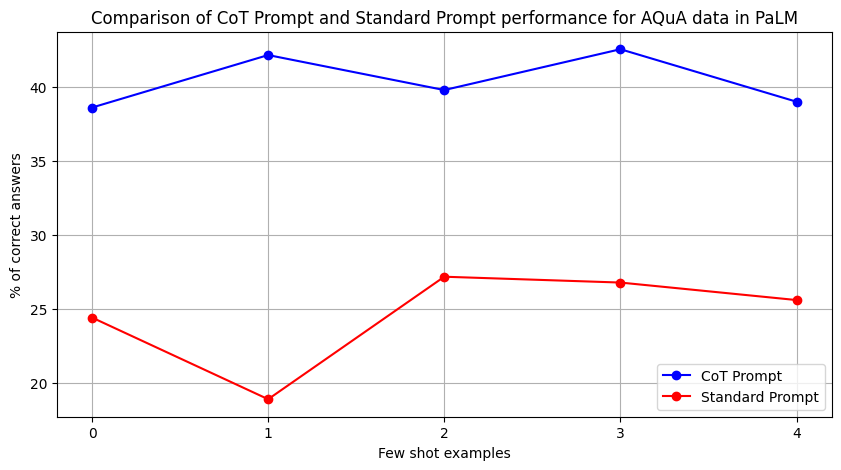

In [103]:
import matplotlib.pyplot as plt

import numpy as np
# Data
shot_num = [0, 1, 2, 3, 4]
CoT_prom = [98, 107, 101, 108, 99]
standard_prom = [62, 48, 69, 68, 65]
CoT_prom=list((100/254)*np.array(CoT_prom))
standard_prom=list((100/254)*np.array(standard_prom))

    
 

# Plot
plt.figure(figsize=(10, 5))

plt.plot(shot_num, CoT_prom, marker='o', label='CoT Prompt', color='blue')
plt.plot(shot_num, standard_prom, marker='o', label='Standard Prompt', color='red')

plt.title('Comparison of CoT Prompt and Standard Prompt performance for AQuA data in PaLM')
plt.xlabel('Few shot examples')
plt.ylabel('% of correct answers')
plt.xticks(shot_num)  # Set x-axis ticks to match shot numbers
plt.grid(True)
plt.legend()

# Save the plot as image1.png
plt.savefig('AQUA.png')

# Show the plot
plt.show()
